**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

**Load Datas**

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
df.sample(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
483,484,22,1,1,17,0.806,2.356,0.0,NBA003,18.6
133,134,32,3,5,23,0.326,0.709,0.0,NBA009,4.5
313,314,29,2,3,15,0.147,0.243,0.0,NBA008,2.6
627,628,27,1,0,16,0.130,0.046,0.0,NBA005,1.1
120,121,29,2,6,21,0.369,2.046,0.0,NBA004,11.5


**Preprocessing**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [4]:
df.dropna(inplace=True)

In [5]:
df = df.drop(columns='Address')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**Separating datas in raw data and labels**

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

**Standardize data**

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Building model and model operaions**

In [8]:
model = KMeans(n_clusters=3,
               init='k-means++',
               n_init=12,
               random_state=42)
model.fit(X)

KMeans(n_clusters=3, n_init=12, random_state=42)

In [9]:
labels = model.labels_

In [10]:
df['Cluster Labels'] = labels
df.groupby('Cluster Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster Labels,,,,,,,,,
0,419.763975,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025
1,416.848000,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
2,438.731884,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884


In [11]:
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


**Visualization**

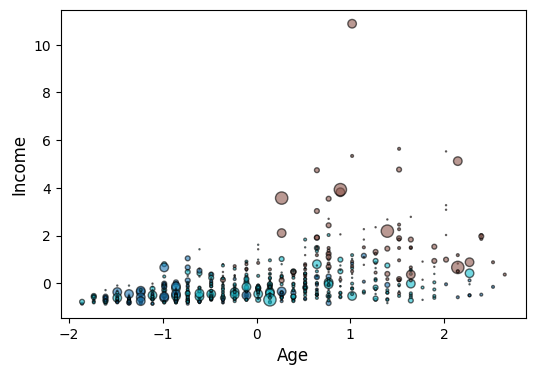

In [12]:
area = np.pi*(X[:, 1])**2
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 3], s=2*area, c=labels.astype(float), cmap='tab10', alpha=0.6, ec='k') # Customer Id column is dropped in X
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.show()

**3D-Visualization using `plotly express`**

In [13]:
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float), color_continuous_scale='inferno')
fig.update_traces(marker=dict(size=5, line=dict(width=0.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
    xaxis=dict(title='Education'),
    yaxis=dict(title='Age'),
    zaxis=dict(title='Income')
))
fig.show()